## 911 Exploratory Analysis Project
For this project we'll analyze the 911 call dataset from Kaggle. The data contains the following fields:

#1.lat : String variable, Latitude
#2.lng: String variable, Longitude
#3.desc: String variable, Description of the Emergency Call
#4.zip: String variable, Zipcode
#5.title: String variable, Title
#6.timeStamp: String variable, YYYY-MM-DD HH:MM:SS
#7.twp: String variable, Township
#8.addr: String variable, Address
#9.e: String variable, Dummy variable (always 1)
  
Let's start with some data analysis and visualisation imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
#sns.set_style('whitegrid')

#plt.rcParams['figure.figsize'] = (6, 4)

In [3]:
df = pd.read_csv('911.csv')
print(df.head())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & 

In [4]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Here we can see that zip columns has many null values

In [6]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


# Basic Analysis

Let's check out the top 5 zipcodes for calls.

In [7]:
df['zip'].isnull().sum()

12855

There are 4841 value's are null into zip column

In [8]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

The top townships for the calls were as follows:

In [9]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

For 30k + entries, how many unique call titles did we have?

In [10]:
df['title'].nunique()

110

Top title for calls were as follows

In [11]:
df['title'].value_counts().head(5)

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

# Data Wrangling for Feature Creation

We can extract some generalised features from the columns in our dataset for further analysis.

In the title column, there's a kind of 'subcategory' or 'reason for call' alloted to each entry (denoted by the text before the colon).

The timestamp column can be further segregated into Year, Month and Day of Week too.

Let's start with creating a 'Reason' feature for each call.

In [12]:
df['title'].dropna(inplace=True)
df['title'].isnull().sum()
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


When you are trying to run above when you will might get Attribute error.for removing that we have to drop all null values from title column

In [13]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

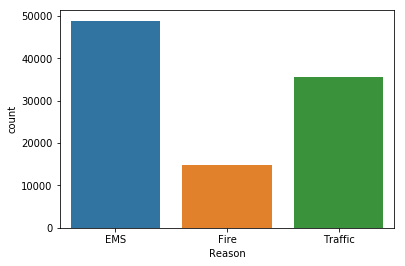

In [14]:
sns.countplot('Reason',data=df)


Let's deal with the time information we have. Checking the datatype of the timestamp column.

In [15]:
type(df['timeStamp'][0])

str


As the timestamps are still string types, it'll make our life easier if we convert it to a python DateTime object, so we can extract the year, month, and day information more intuitively.

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
print(df['timeStamp'][:5])

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]



For a single DateTime object, we can extract information as follows.

In [17]:
time = df['timeStamp'].iloc[0]
print("Hour :",time.hour)
print('Month :',time.month)
print("Day of week :",time.dayofweek)

Hour : 17
Month : 12
Day of week : 3


Now let's create new features for the above pieces of information.

In [18]:
df['Hour']  = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day Of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
print(df.head())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  Hour  Month  Day Of W

In [19]:
#df['Day Of Week'].isnull().sum()
df['Day Of Week'].value_counts()

1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: Day Of Week, dtype: int64

In [20]:
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day Of Week'] = df['Day Of Week'].map(day_map)
print(df.head())
           

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  Hour  Month Day Of We

In [21]:
df['Day Of Week'].value_counts()

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: Day Of Week, dtype: int64


Let's combine the newly created features, to check out the most common call reasons based on the day of the week.

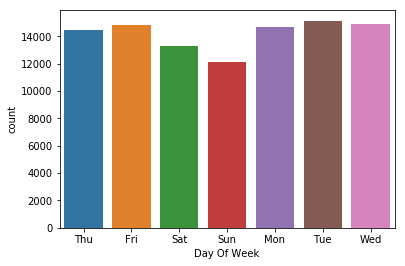

In [22]:
sns.countplot('Day Of Week',data=df)

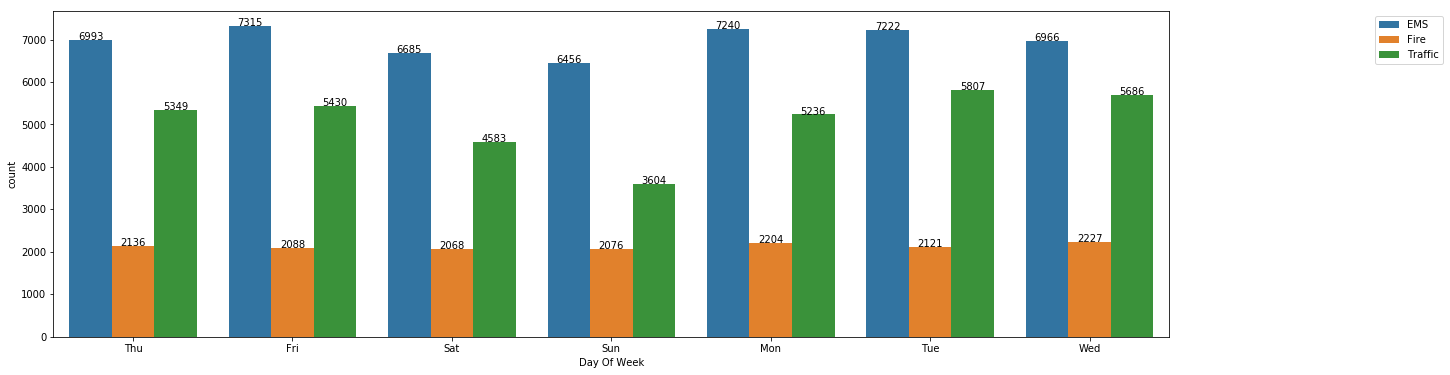

In [23]:
fix,ax1 = plt.subplots(figsize=(20,6))
graph=sns.countplot('Day Of Week',data=df,hue='Reason',ax=ax1)
plt.legend(bbox_to_anchor=(1.25,1))
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")


It makes sense for the number of traffic related 911 calls to be the lowest during the weekends, what's also iteresting is that Emergency Service related calls are also low during the weekend.

Let's extract the date from the timestamp, and see behavior in a little more detail.

In [24]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [25]:
print(df.head())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  Hour  Month Day Of We

C:\Users\IamChamp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  


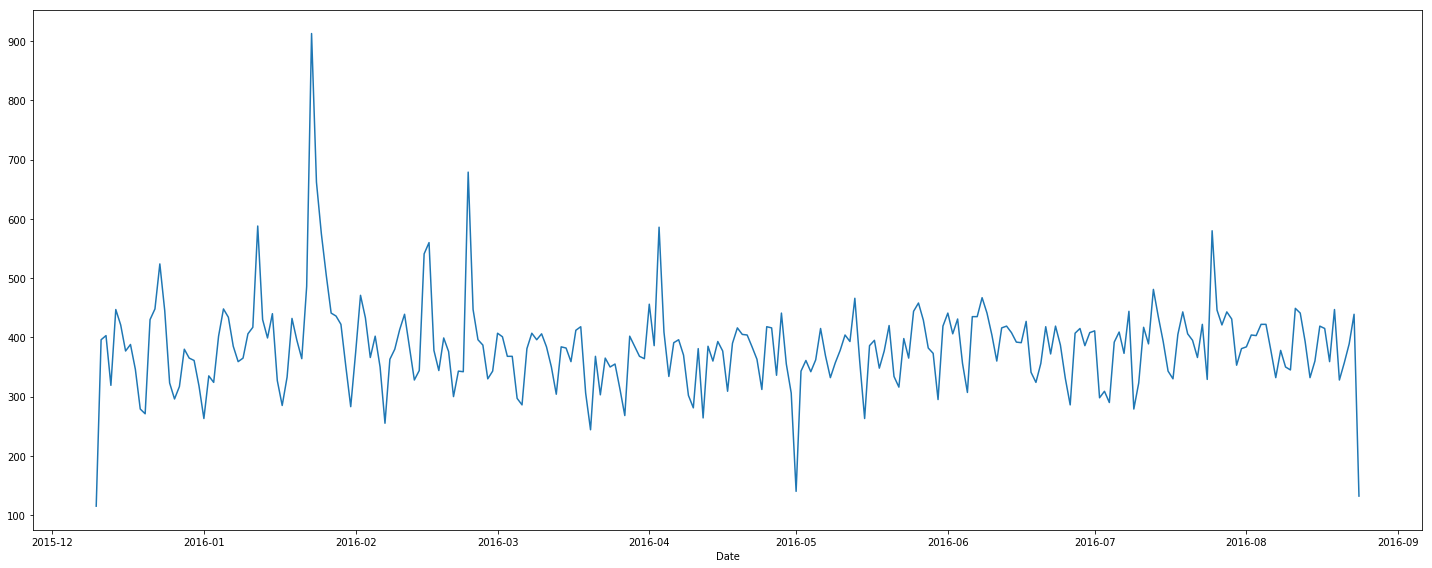

In [26]:
fig, ax = plt.subplots(figsize=(20, 8))
pd.groupby(df,'Date').count()['e'].plot.line(y='e')
#df['Month'].value_counts()
plt.legend().remove()
plt.tight_layout()

We can also check out the same plot for each reason separately.

C:\Users\IamChamp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  


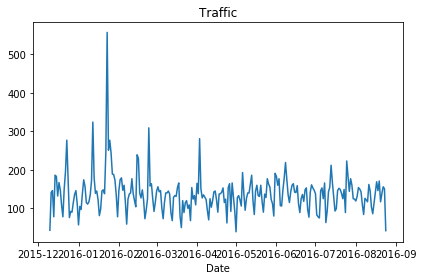

In [31]:
#fig, ax = plt.subplots(figsize=(20, 7))
pd.groupby(df[df['Reason']=='Traffic'],'Date').count().plot.line(y='e')
plt.title('Traffic')
plt.legend().remove()
plt.tight_layout()



Let's create a heatmap for the counts of calls on each hour, during a given day of the week.

In [28]:
#print(df.head())
day_hour = df.pivot_table(values='lat',index='Day Of Week',columns='Hour',aggfunc='count')
print(day_hour)

Hour          0    1    2    3    4    5    6    7    8    9  ...    14   15  \
Day Of Week                                                   ...              
Fri          275  235  191  175  201  194  372  598  742  752 ...   932  980   
Mon          282  221  201  194  204  267  397  653  819  786 ...   869  913   
Sat          375  301  263  260  224  231  257  391  459  640 ...   789  796   
Sun          383  306  286  268  242  240  300  402  483  620 ...   684  691   
Thu          278  202  233  159  182  203  362  570  777  828 ...   876  969   
Tue          269  240  186  170  209  239  415  655  889  880 ...   943  938   
Wed          250  216  189  209  156  255  410  701  875  808 ...   904  867   

Hour           16    17   18   19   20   21   22   23  
Day Of Week                                            
Fri          1039   980  820  696  667  559  514  474  
Mon           989   997  885  746  613  497  472  325  
Sat           848   757  778  696  628  572  506  467  

# Now create a HeatMap using this new DataFrame.

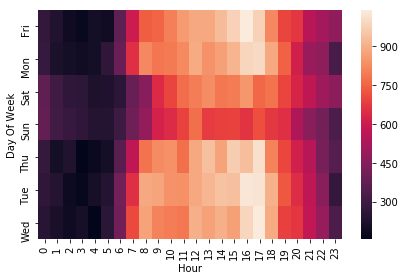

In [32]:

sns.heatmap(day_hour)

plt.tight_layout()

We see that most calls take place around the end of office hours on weekdays. We can create a clustermap to pair up similar Hours and Days.

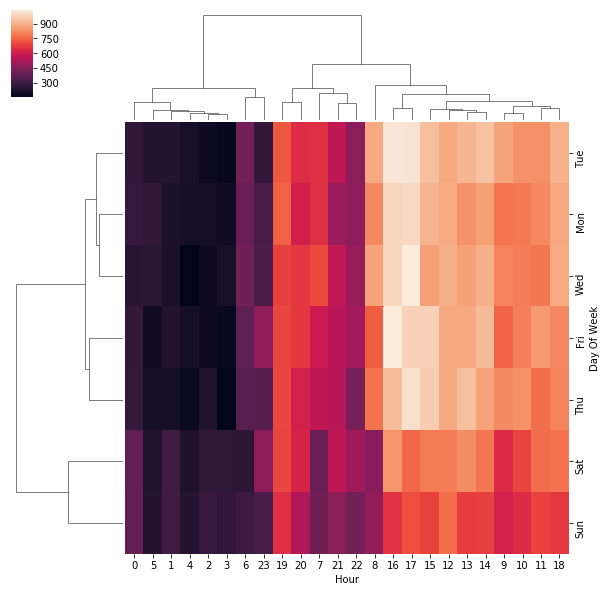

In [33]:
sns.clustermap(day_hour)



And this concludes the exploratory analysis project.